In [1]:
import pandas as pd
import requests

from bs4 import BeautifulSoup
import bs4
import unidecode

# 1 - imports
from datetime import datetime, date

import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

import sqlite3


In [2]:
%matplotlib notebook

# Stats secondaires 

In [3]:
url="https://fbref.com/en/comps/13/schedule/Ligue-1-Scores-and-Fixtures"
page_response=requests.get(url,timeout=5)
soup =BeautifulSoup(page_response.content, 'html.parser')

In [4]:
base_url='https://fbref.com'

In [5]:
# select correct ligue 1 table 
table_ligue1= soup.find('table', id="sched_10732_1")

In [6]:
table_elements=table_ligue1.find_all('td')

In [7]:
dom_fouls = []
dom_corners=[]
dom_crosses=[]
dom_touches=[]
dom_tackles=[]
dom_interceptions=[]
dom_aerials_won=[]
dom_clearances=[]
dom_offsides=[]
dom_goal_kicks=[]
dom_throw_ins=[]
dom_long_balls=[]


In [8]:
ext_fouls=[]
ext_corners=[]
ext_crosses=[]
ext_touches=[]
ext_tackles=[]
ext_interceptions=[]
ext_aerials_won=[]
ext_clearances=[]
ext_offsides=[]
ext_goal_kicks=[]
ext_throw_ins=[]
ext_long_balls=[]

In [9]:
int(all_div[42].text)

NameError: name 'all_div' is not defined

In [ ]:
liens=[]
i=1
for element in table_elements:
    if element['data-stat'] == 'match_report' :
        try: 
            url_match = base_url+element.find('a')['href']
            liens.append(url_match)
            page_response = requests.get(url_match,timeout=5)
            soup = BeautifulSoup(page_response.content, 'html.parser')
            result = soup.find("div", {"id": "team_stats_extra"})
            all_div = result.find_all('div')
            try : 
                dom_fouls.append(int(all_div[4].text))
            except: 
                dom_fouls.append('')
            try :
                ext_fouls.append(int(all_div[6].text))
            except :
                ext_fouls.append('')
            try : 
                dom_corners.append(int(all_div[7].text))
            except : 
                dom_corners.append('')
            try:
                ext_corners.append(int(all_div[9].text))
            except :
                ext_corners.append('')
            try: 
                dom_crosses.append(int(all_div[10].text))
            except:
                dom_crosses.append('')
            try: 
                ext_crosses.append(int(all_div[12].text))
            except: 
                ext_crosses.append("")
            try : 
                dom_touches.append(int(all_div[13].text))
            except: 
                dom_touches.append("")
            try: 
                ext_touches.append(int(all_div[15].text))
            except: 
                ext_touches.append("")
            try:
                dom_tackles.append(int(all_div[20].text))
            except :
                dom_tackles.append('')
            try: 
                ext_tackles.append(int(all_div[22].text))
            except: 
                ext_tackles.append("")
            try: 
                dom_interceptions.append(int(all_div[23].text))
            except:
                dom_interceptions.append("")
            try:
                ext_interceptions.append(int(all_div[25].text))
            except:
                ext_interceptions.append("")
            try:
                dom_aerials_won.append(int(all_div[26].text))
            except:
                dom_aerials_won.append("")
            try:
                ext_aerials_won.append(int(all_div[28].text))
            except :
                ext_aerials_won.append("")
            try:
                dom_clearances.append(int(all_div[29].text))
            except: 
                dom_clearances.append("")
            try:
                ext_clearances.append(int(all_div[31].text))
            except:
                ext_clearances.append('')
            try:
                dom_offsides.append(int(all_div[36].text))
            except:
                dom_offsides.append("")
            try :
                ext_offsides.append(int(all_div[38].text))
            except:
                ext_offsides.append("")
            try:
                dom_goal_kicks.append(int(all_div[39].text))
            except:
                dom_goal_kicks.append("")
            try:
                ext_goal_kicks.append(int(all_div[41].text))
            except:
                ext_goal_kicks.append("")
            try:
                dom_throw_ins.append(int(all_div[42].text))
            except:
                dom_throw_ins.append("")
            try:
                ext_throw_ins.append(int(all_div[44].text))
            except:
                ext_throw_ins.append("")
            try:
                dom_long_balls.append(int(all_div[45].text))
            except:
                dom_long_balls.append("")
            try:
                ext_long_balls.append(int(all_div[47].text))    
            except:
                ext_long_balls.append("")
        except :
            continue
        i+=1

In [ ]:
# add link to ligue 1 global results table: 
# create df of ligue 1 results 
df=pd.read_html('https://fbref.com/en/comps/13/schedule/Ligue-1-Scores-and-Fixtures')
df=df[1]
df=df.dropna(how='all').reset_index(drop=True)

In [ ]:
df['Match Report']= liens
df['dom_fouls'] = dom_fouls
df['dom_corners']= dom_corners
df['dom_crosses']=dom_crosses
df['dom_touches']= dom_touches
df['dom_tackles']= dom_tackles
df['dom_interceptions']= dom_interceptions
df['dom_aerials_won']= dom_aerials_won
df['dom_clearances']= dom_clearances
df['dom_offsides']= dom_offsides
df['dom_goal_kicks']= dom_goal_kicks
df['dom_throw_ins']= dom_throw_ins
df['dom_long_balls']= dom_long_balls
df['ext_fouls']= ext_fouls
df['ext_corners']= ext_corners
df['ext_crosses']= ext_crosses
df['ext_touches']= ext_touches
df['ext_tackles']= ext_tackles
df['ext_interceptions']= ext_interceptions
df['ext_aerials_won']= ext_aerials_won
df['ext_clearances']= ext_clearances
df['ext_offsides']= ext_offsides
df['ext_goal_kicks']=ext_goal_kicks
df['ext_throw_ins']= ext_throw_ins
df['ext_long_balls']=ext_long_balls

# Stats principales

In [ ]:
i=0
for lien in liens : 
    try:
        dfs=pd.read_html(lien)
        df_main_stats=dfs[2]
        df_main_stats.columns =df_main_stats.columns.droplevel(1)
        df_main_stats=df_main_stats.rename(columns={df_main_stats.columns[0]:'Dom_team',df_main_stats.columns[1]:'Ext_team'})
        df.at[i,'Dom_possession']= df_main_stats['Dom_team'][0]
        df.at[i,'Ext_possession']= df_main_stats['Ext_team'][0]

        df.at[i,'Dom_passing_succeed']= int(df_main_stats['Dom_team'][2].split('of')[0].strip())
        df.at[i,'Dom_passing_tried'] = int(df_main_stats['Dom_team'][2].split('of')[1].split('—')[0].strip())
        df.at[i,'Ext_passing_succeed'] = int(df_main_stats['Ext_team'][2].split('—')[1].split('of')[0].strip())
        df.at[i,'Ext_passing_tried'] =int(df_main_stats['Ext_team'][2].split('—')[1].split('of')[1].strip())

        df.at[i,'Dom_shots_succeed'] = int(df_main_stats['Dom_team'][4].split('of')[0].strip())
        df.at[i,'Dom_shots_tried'] = int(df_main_stats['Dom_team'][4].split('of')[1].split('—')[0].strip())
        df.at[i,'Ext_shots_succeed'] = int(df_main_stats['Ext_team'][4].split('—')[1].split('of')[0].strip())
        df.at[i,'Ext_shots_tried'] = int(df_main_stats['Ext_team'][4].split('—')[1].split('of')[1].strip())

        df.at[i,'Dom_save_succeed']= int(df_main_stats['Dom_team'][6].split('of')[0].strip())
        df.at[i,'Dom_save_tried'] = int(df_main_stats['Dom_team'][6].split('of')[1].split('—')[0].strip())
        df.at[i,'Ext_save_succeed'] = int(df_main_stats['Ext_team'][6].split('—')[1].split('of')[0].strip())
        df.at[i,'Ext_save_tried'] = int(df_main_stats['Ext_team'][6].split('—')[1].split('of')[1].strip())
    except:
        continue

    i+=1
    

In [ ]:
df.to_pickle('matchs_enrichis2.pkl')

In [ ]:
df['Ext_passing_tried'].value_counts()

# Ajout à la base de données

In [ ]:
con = sqlite3.connect('football_orm.sqlite')
request = "SELECT count(goals.id) as total_goal, rainfall FROM goals JOIN matches ON goals.match_id = matches.id GROUP BY matches.rainfall;"
df = pd.read_sql(request, con)

In [10]:
df_match_enrichis=pd.read_pickle('matchs_enrichis2.pkl')

In [ ]:
df_match_enrichis.columns

In [ ]:
df_match_enrichis['fouls']= df_match_enrichis['dom_fouls']+df_match_enrichis['ext_fouls']
df_match_enrichis['corners']= df_match_enrichis['dom_corners']+df_match_enrichis['ext_corners']
df_match_enrichis['crosses']= df_match_enrichis['dom_crosses']+df_match_enrichis['ext_crosses']
df_match_enrichis['tackles']= df_match_enrichis['dom_tackles']+df_match_enrichis['ext_tackles']
df_match_enrichis['interceptions']= df_match_enrichis['dom_interceptions']+df_match_enrichis['ext_interceptions']
df_match_enrichis['aerial_wons']= df_match_enrichis['dom_aerials_won']+df_match_enrichis['ext_aerials_won']
df_match_enrichis['clearances']= df_match_enrichis['dom_clearances']+df_match_enrichis['ext_clearances']
df_match_enrichis['offsides']= df_match_enrichis['dom_offsides']+df_match_enrichis['ext_offsides']
df_match_enrichis['goal_kicks']= df_match_enrichis['dom_goal_kicks']+df_match_enrichis['ext_goal_kicks']
df_match_enrichis['throw_ins']= df_match_enrichis['dom_throw_ins']+df_match_enrichis['ext_throw_ins']
df_match_enrichis['passing_succeed']= df_match_enrichis['Dom_passing_succeed']+df_match_enrichis['Ext_passing_succeed']
df_match_enrichis['passing_tried']= df_match_enrichis['Dom_passing_tried']+df_match_enrichis['Ext_passing_tried']
df_match_enrichis['shot_succeed']= df_match_enrichis['Dom_shots_succeed']+df_match_enrichis['Ext_shots_succeed']
df_match_enrichis['shot_tried']= df_match_enrichis['Dom_shots_tried']+df_match_enrichis['Ext_shots_tried']
df_match_enrichis['save_succeed']= df_match_enrichis['Dom_save_succeed']+df_match_enrichis['Ext_save_succeed']


In [ ]:
df_match_enrichis=df_match_enrichis.drop(['dom_fouls',
       'dom_corners', 'dom_crosses', 'dom_touches', 'dom_tackles',
       'dom_interceptions', 'dom_aerials_won', 'dom_clearances',
       'dom_offsides', 'dom_goal_kicks', 'dom_throw_ins', 'dom_long_balls',
       'ext_fouls', 'ext_corners', 'ext_crosses', 'ext_touches', 'ext_tackles',
       'ext_interceptions', 'ext_aerials_won', 'ext_clearances',
       'ext_offsides', 'ext_goal_kicks', 'ext_throw_ins', 'ext_long_balls',
       'Dom_possession', 'Ext_possession', 'Dom_passing_succeed',
       'Dom_passing_tried', 'Ext_passing_succeed', 'Ext_passing_tried',
       'Dom_shots_succeed', 'Dom_shots_tried', 'Ext_shots_succeed',
       'Ext_shots_tried', 'Dom_save_succeed', 'Dom_save_tried',
       'Ext_save_succeed', 'Ext_save_tried'],axis=1)

In [ ]:
goals=[]
for index, value in enumerate(df_match_enrichis['Score']):
    goals.append(int(value.split('–')[0])+int(value.split('–')[1]))

In [ ]:
df_match_enrichis['goals']= goals

In [ ]:
dict_notes={"fouls": 1, 
"corners": 3,
"crosses": 3,
"tackles": 2,
"interceptions": 2,
"aerial_wons": 1, 
"clearances": 4,
"offsides": 2, 
"goal_kicks": 1, 
"throw_ins": 0, 
"passing_succeed":0.01,
"passing_tried": 0.005,
"shot_succeed":7,
"shot_tried": 5,
"save_succeed":7,
"goals":10 
}   

In [ ]:
for element in dict_notes:
    df_match_enrichis[element]=df_match_enrichis[element].apply(lambda x: x * dict_notes[element])


In [ ]:
df_match_enrichis['Notes']= df_match_enrichis[['fouls',
       'corners', 'crosses', 'tackles', 'interceptions', 'aerial_wons',
       'clearances', 'offsides', 'goal_kicks', 'throw_ins', 'passing_succeed',
       'passing_tried', 'shot_succeed', 'shot_tried', 'save_succeed', 'goals']].sum(axis=0)

In [ ]:
df_match_enrichis['Notes']= df_match_enrichis[['fouls',
       'corners', 'crosses', 'tackles', 'interceptions', 'aerial_wons',
       'clearances', 'offsides', 'goal_kicks', 'throw_ins', 'passing_succeed',
       'passing_tried', 'shot_succeed', 'shot_tried', 'save_succeed', 'goals']].sum(axis=1)

In [ ]:
df_match_enrichis[['Notes', 'fouls',
       'corners', 'crosses', 'tackles', 'interceptions', 'aerial_wons',
       'clearances', 'offsides', 'goal_kicks', 'throw_ins', 'passing_succeed',
       'passing_tried', 'shot_succeed', 'shot_tried', 'save_succeed', 'goals']]

In [ ]:
con= sqlite3.connect('football_orm.sqlite')
request = "ALTER TABLE matches ADD match_note FLOAT ;"
con.execute(request)

In [ ]:
# change of paris sg name to Paris as it is saved in our database
df_match_enrichis.loc[df_match_enrichis['Home'] == 'Paris S-G', 'Home'] = 'Paris'

In [ ]:
for date, place,note in zip(df_match_enrichis['Date'],df_match_enrichis['Home'],df_match_enrichis['Notes']):
    request= "UPDATE matches SET match_note = (?) WHERE matches.date = (?) AND matches.place=(?);"
    cursor=con.cursor()
    cursor.execute(request,(note,date,place))
    con.commit()
#    con.close()   

In [12]:
request = "SELECT * FROM matches ;"

df = pd.read_sql(request, con)

NameError: name 'con' is not defined

In [ ]:
df

In [ ]:
df[df.match_note.isnull()]

In [ ]:
df_match_enrichis['Home'].value_counts()

In [ ]:
df.groupby('rainfall')['match_note'].mean()

# Viz

In [19]:
df2= df.groupby(['temperature','rainfall'], as_index=False)['match_note'].mean()

In [20]:
df2

,temperature,rainfall,match_note
0,-3.5,3.0,700.530000
1,-3.0,1.0,730.630000
2,-2.5,0.0,822.190000
3,-1.5,0.0,732.730000
4,-1.5,1.0,642.110000
...,...,...,...
206,25.5,1.0,655.582500
207,26.0,0.0,662.765000
208,26.5,0.0,716.163333
209,27.0,0.0,804.300000


<IPython.core.display.Javascript object>


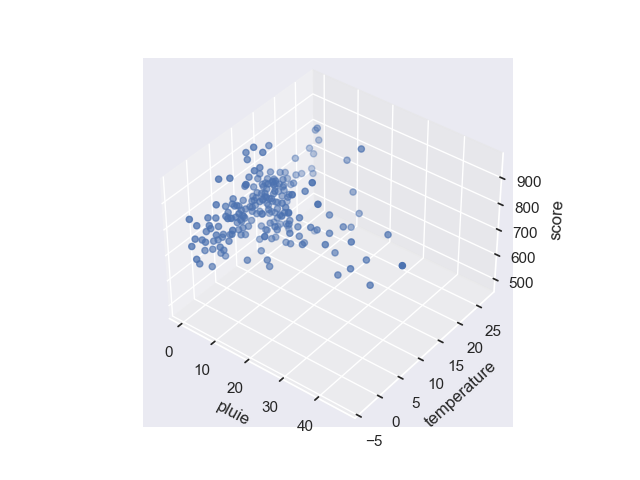

In [21]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df2['rainfall']
y = df2['temperature']
z = df2['match_note']

ax.set_xlabel("pluie")
ax.set_ylabel("temperature")
ax.set_zlabel("score")

ax.scatter(x, y, z)

plt.show()

In [14]:
con= sqlite3.connect('football_orm.sqlite')
request = "SELECT * FROM matches ;"

df = pd.read_sql(request, con)

In [ ]:
con.close()

In [ ]:
request = "SELECT * FROM matches ;"

df = pd.read_sql(request, con)

In [15]:
df3= df.groupby('place', as_index=False)['match_note'].mean()

In [16]:
df3

,place,match_note
0,Angers,729.026842
1,Bordeaux,660.155263
2,Brest,759.684737
3,Dijon,727.668947
4,Lens,722.010263
5,Lille,717.163421
6,Lorient,695.626579
7,Lyon,727.810789
8,Marseille,735.622368
9,Metz,720.554474


<IPython.core.display.Javascript object>


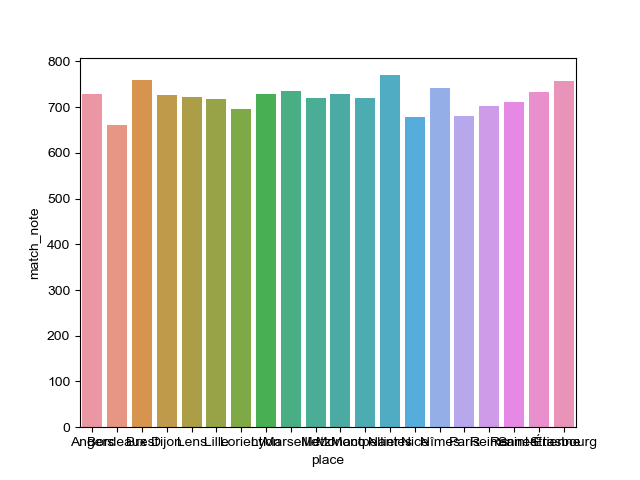

In [17]:
sns.barplot(x=df3['place'],y =df3['match_note']);

In [18]:
request = "SELECT * FROM matches_teams  ;"

df_but = pd.read_sql(request, con)

In [ ]:
df_but

In [ ]:
request = """SELECT T.name,MT.matchs_id,MT.team_goals ,M.rainfall, M.temperature
FROM teams as T 
    JOIN matches_teams as MT on MT.team_id = T.id 
    JOIN matches as M on MT.matchs_id = M.id
;"""

df_total_goals = pd.read_sql(request, con)

In [ ]:
df_total_goals[df_total_goals.matchs_id ==34]

In [ ]:
request = """SELECT P.name,G.goal_type,M.rainfall, M.temperature
FROM goals AS G 
    JOIN matches as M on M.id = G.match_id
    JOIN players as P on G.player_id = P.id
;"""

df_goals_players = pd.read_sql(request, con)

In [ ]:
df_goals_players

In [ ]:
request = """SELECT count(goals.id) as total_goal, temperature 
FROM goals 
JOIN matches ON goals.match_id = matches.id 
GROUP BY matches.temperature;"""
df_total_goals_temp=pd.read_sql(request,con)

In [ ]:
!pip install jupyter-dash

In [11]:
import pandas as pd
import sqlite3

In [ ]:
con = sqlite3.connect('football_orm.sqlite')
request = """SELECT * from matches"""
df = pd.read_sql(request, con)
df